<a href="https://colab.research.google.com/github/shuken1019/Python25study/blob/main/01_01_mbc%EB%A7%88%EC%BC%93%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 알고리즘은 지도학습과 비지도학습으로 나누어 진다.

1.지도학습: 훈련하기 위한 데이터와 정답이 필요

2.비지도학습: 정답이 없는 학습 자료가 필요하다.

지도학습에서 데이터와 정답을 코드로 입력해서 전처리를 해야하는데,

이때 데이터를 input 이라는 변수에 넣고, 정답을 target이라는 변수에 넣어 진행하겠다.

이 input 과 target을 합쳐서 훈련데이터(training data)라고 한다.

이 입력으로 사용된 길이와 무게 ->특성(feature)

대부분 수치자료를 이용해서 판단하고 학습하며 분석할 수 있는 기법을 알아보자.

In [3]:
#MBC마켓에서는 살아있는 생선을 최초로 판매하려고 한다.
#고객이 온라인 주문을 하면 가장 빠른 물류 센터에서 신선한 생선을 곧바로 배송
#여기서 문제가 발생!! ->생선 포장 직원이 생선의 종류를 알지 못함.
#IP 카메라를 이용해서 수족관을 실시간 촬영 이것을 객체 추적 기술로 활용?

#현재는 AI 기술을 배우는 단계라 사이즈를 이용해서 Ai한테 학습을 시켜보겠음.

#일단 도미와 빙어부터 시작한다. (2개의 객체를 찾도록 훈련->머신러닝)

#전처리 데이터가 필요함.
# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

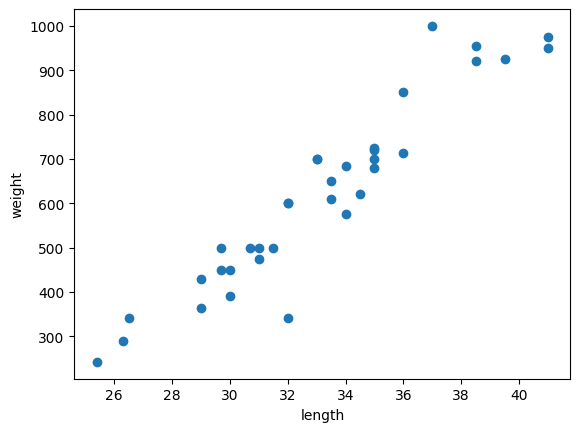

In [4]:
#특성: 자료를 합쳐놓은것 .데이터의 특징(수치자료, 이미지자료, 배열자료 등,,,,)
#첫번째 도미의 특성: 길이(25.4cm), 무게(242.0g)
#두번째 도미의 특성: 길이(26.3cm), 무게(290.0g)

#두 특성을 숫자로 보는 것보다 그래프를 표현하면 데이터를 잘 이해할 수 있다.
#길이: x축 / 무게:Y축 ->산점도(두 좌표의 관계)

#파이썬의 외부 라이브러리를 이용해서 차트 표시용 코드

import matplotlib.pyplot as plt
#과학계산용으로 그래프를 그리는 대표적인 패키지: matplotlib
#https://wikidocs.net/269534

plt.scatter(bream_length, bream_weight)
#가로길이 배열과 무게 배열을 차트로 만듬

plt.xlabel('length') #x축 라벨
plt.ylabel('weight') #y축 라벨
plt.show()

In [ ]:
#보고서 작성한다.!!
#도미 35마리를 2차원 그래프에 점으로 나타내 보았다.
#결론: 생선의 길이가 길수록 무게가 많이 나간다. ->선형적이라고 함.

In [5]:
#빙어 데이터를 14개 준비


# 빙어 생선의 길이 : bream_length 도미용 길이 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 생선의 무게 : bream_weigh 도미용 무게 리스트
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


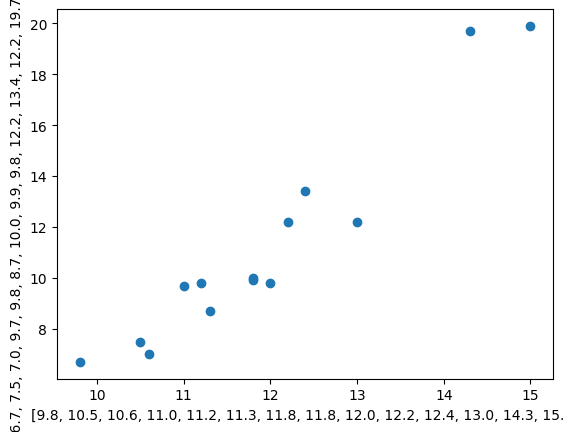

In [7]:
import matplotlib.pyplot as plt
plt.scatter(smelt_length,smelt_weight)
plt.xlabel(smelt_length)
plt.ylabel(smelt_weight)
plt.show()

In [8]:
#지금까지 리스트에 나누어져있던 배열을 ai학습용으로 재배치를 한다.
length =bream_length+smelt_length # 도미의 길이 + 빙어의 길이
weight =bream_weight+smelt_weight # 도미의 무게 + 빙어의 무게

print(length) #물고기의 길이들


[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [11]:
print(weight) #물고기들의 무게

[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [13]:
#zip()나열된 리스트 각각에서 하나씩 원소를 꺼내어 반환
fish_date = [[l,w] for l,w in zip (length, weight)]
#length, weight 를 2차원 리스트로 만듬
print(fish_date) #2차원 리스트를 출력해봄

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [14]:
#머신러닝은 정답을 target 이라는 값으로 알려줘야 한다.
#target 0(빙어) , 1(도미)을 처리하려 함.
#생선 49개에 대한 정답 리스트를 만들어야함.
#머신러닝에서는 정답 데이터를 2진분류로 테스트 해볼까 함. (1:도미, 0: 빙어)
fish_target =[1] *35 +[0] *14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
#지금까지 전처리 데이터를 만들었다면 ai에 기본적으로 기초가 되는 사이킷런을 활용하여 트레이닝을 시켜보자
#https://wikidocs.net/26300
#코랩은 ai용 외부 라이브러리가 내장되어 있음.
#local idle에 실행하려면 pip install
from sklearn.neighbors import KNeighborsClassifier #사이킷런패키지안에 , 이웃패키지 k- 최근접 이웃 분류용 알고리즘
#kn.하면 k-최근접 알고리즘을 사용한다.
kn=KNeighborsClassifier() #임포트된 객체를 생성하여 변수에 연결

In [18]:
#객체를 호출하였으면 전처리 데이터를 삽입한다.
#fish_data, fish_target을 전달하여 도미를 찾기 위한 기준을 학습(.fit)시킨다.
#(트레이닝데이터 : 훈련 정답 데이터)
kn.fit(fish_date, fish_target)#훈련 끝

KNeighborsClassifier()

In [30]:
#kn 얼마나 잘 훈련되었는지 평가를 해보자. score()
kn.score(fish_date, fish_target) #1.0 ->100%(정확도)
#훈련시 전처리 데이터가 얼마되지 않아 100%나옴 (과대적합)->85%~ 90%정상

1.0

In [21]:
#k-최근접 이웃 알고리즘 파악 해보기
#어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고
#다수를 차지하는 것을 정답으로 출력

In [22]:
kn.predict([[30,600]]) #predict[길이, 무게] 새로운 데이터의 정답을 예측(2진분류)
#결론 1 ->도미

array([1])

In [23]:
kn.predict([[8,10]]) #.predict[길이, 무게] 새로운 데이터의 정답을 예측(2진분류)
#결론 0 ->빙어

array([0])

In [24]:
#k-최근접 이웃 알고리즘을 위해 준비해야 할 일은 데이터를 모두 가지고 있는게 전부!
#새로운 데이터에 대해 예측할 때 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기만 함.
#단점.데이터가 아주 많은 경우 사용하기 좀 어렵다.
#(데이터가 크기 때문에 메모리가 많이 필요, 직선거리 게산 시간도 오래 걸림)
#객체를 메모리에 만들고 활용한다.
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
print(kn._fit_method)

kd_tree


In [26]:
print(kn._y)#정답파일 1:도미, 0:빙어

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
#결론 k-최근접 이웃 알고리즘은 훈련 결과 파일이 존재하지 않는다.
#새로운 데이터가 들어오면 가장 가까운 데이터를 메모리에서 참고하여 도미(1), 빙어(0)을 구분함
kn.predict([[5,15]]) #길이가 5cm , 무게가 15g인 값을 판단하면 0:빙어

array([0])

In [28]:
#객체 생성시 n_neighbors=??? 참고할 이웃 데이터 수 기본 값은 5
#이웃 객체를 5개 찾아서 결론을 낸다.
#만약 5개가 아닌 다른 값으로 변경하여 데이터를 훈련하고 싶으면??

#전에는 기본값으로 생성 kn =KNeighborsClassfier()
kn49=KNeighborsClassifier(n_neighbors=49) #참고 데이터를 49개로 한 모델 kn49변수
#원본타겟, 원본데이터가 49인데
#가장 가까운 데이터 49개를 사용함.

kn49.fit(fish_date, fish_target)
kn49.score(fish_date,fish_target) #훈련결과 71%로 좋지 않은 성능을 보임.

0.7142857142857143

In [29]:
#n_neighbors=값을 변경해 가면서 최적의 정답을 찾는것이 머신러닝 훈련개발자의 목표
kn49.predict([[5,15]]) #길이 5cm , 무게 15g 인 데이터를 찾아보자

array([1])